# Task 3: Disease Diagnosis Prediction with Heart Disease Dataset
---

## Introduction

Predicting disease risk from patient medical data can significantly aid in early detection and prevention, allowing healthcare professionals to intervene sooner. In this project, I build and evaluate machine learning models for predicting the likelihood of heart disease using a standard heart disease dataset. The workflow covers exploratory analysis, feature engineering, model training, and actionable medical insights.

---


## Table of Contents

1. [Introduction](#introduction)
2. [Step 1: Data Loading and Inspection](#step-1-data-loading-and-inspection)
3. [Step 2: Exploratory Data Analysis (EDA)](#step-2-exploratory-data-analysis-eda)
4. [Step 3: Feature Selection and Scaling](#step-3-feature-selection-and-scaling)
5. [Step 4: Model Training](#step-4-model-training)
6. [Step 5: Model Evaluation](#step-5-model-evaluation)
7. [Step 6: Healthcare Insights](#step-6-healthcare-insights)
---

In [18]:
# import essential  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

## Step 1: Data Loading and Inspection

In [ ]:

# Load the dataset
df = pd.read_csv('heart_disease_data.csv')

# Basic inspection
print("Dataset shape:", df.shape)
display(df.head())
print("Columns:", df.columns.tolist())
df.info()
df.describe()


Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


I loaded the heart disease dataset and performed a basic inspection to understand its structure, feature names, and data types. This step confirms the dataset is ready for analysis and helps identify potential issues such as missing values or data type inconsistencies.

---


## Step 2: Exploratory Data Analysis (EDA)

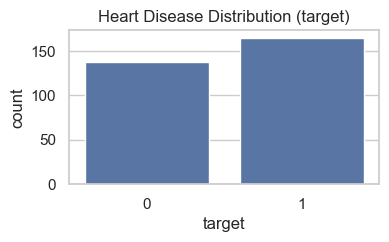

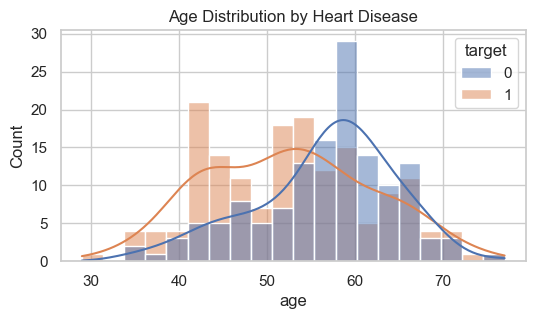

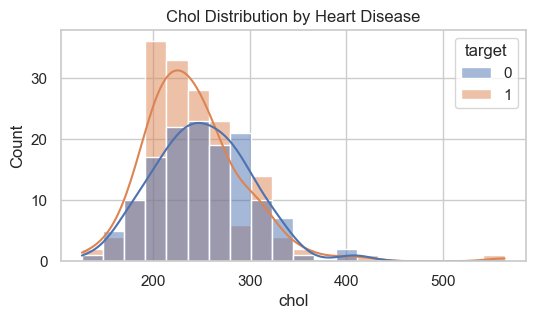

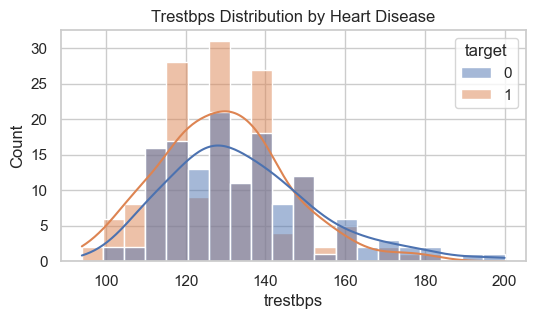

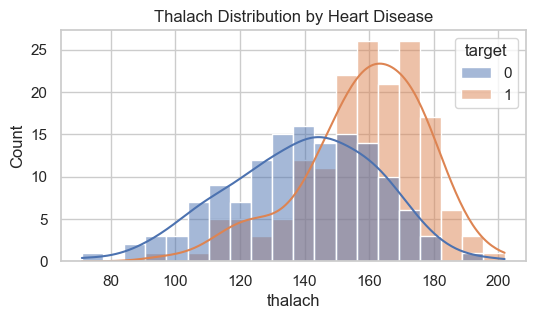

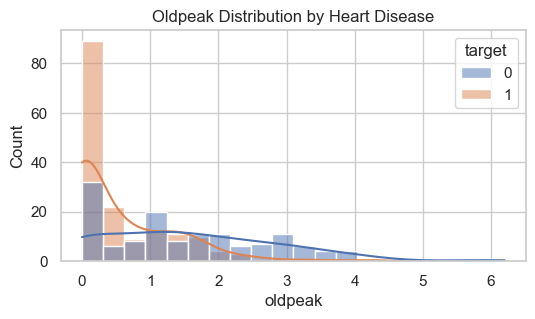

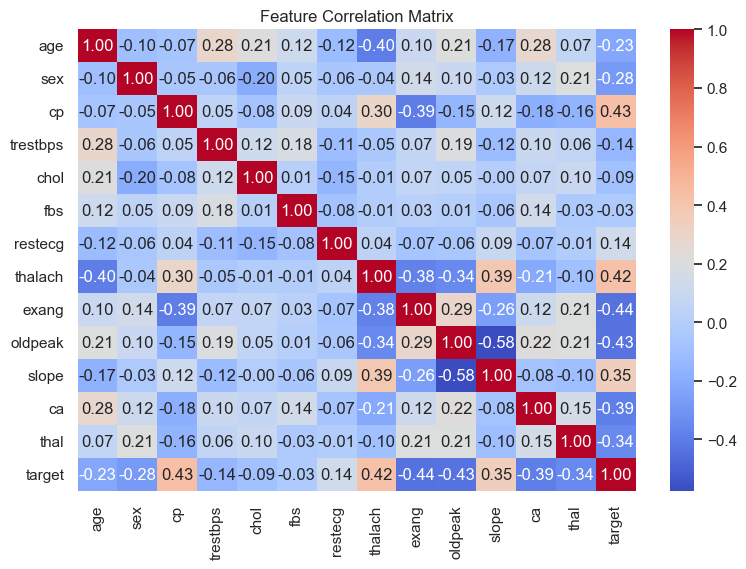

In [13]:
# Visualize target balance
plt.figure(figsize=(4,2))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (target)')
plt.show()

# Visualize feature distributions by target
features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
for feat in features:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=feat, hue='target', kde=True, bins=20)
    plt.title(f'{feat.capitalize()} Distribution by Heart Disease')
    plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

I explored the distributions and relationships between key medical features and the heart disease outcome:

- The target variable is roughly balanced between presence and absence of heart disease.
- Features like age, cholesterol, resting blood pressure, and maximum heart rate show noticeable trends with the disease outcome.
- The correlation matrix highlights the strongest feature relationships and suggests which features may be important for prediction.

---

## Step 3: Feature Selection and Scaling

In [14]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Optional: Check feature correlation with target
corr_with_target = df.corr()['target'].sort_values(ascending=False)
print("Feature correlations with target:\n", corr_with_target)

# Train-test split (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature correlations with target:
 target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


I reviewed feature correlations with the target variable to understand which medical indicators are most predictive of heart disease. All core features appear informative and were retained for modeling.

To ensure optimal model performance, I standardized all numeric features using z-score normalization (mean 0, standard deviation 1). This step is especially important for models sensitive to feature scales, such as Support Vector Machines and neural networks.

---

## Step 4: Model Training


In [17]:
# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = gb_model.predict(X_test_scaled)
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:,1]
print("Prediction Of Model: ",y_pred)
print("Probablity Prediction Of Model: ", y_pred_proba)

Prediction Of Model:  [0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1]
Probablity Prediction Of Model:  [0.01797581 0.47667232 0.00962474 0.61102829 0.68088527 0.10945969
 0.95737623 0.05682961 0.90797854 0.30970598 0.63599415 0.84852618
 0.07397366 0.91104623 0.95298839 0.76424882 0.95827233 0.94420724
 0.95846951 0.90777132 0.92876879 0.33271766 0.91302956 0.82688833
 0.97525081 0.03814291 0.05262685 0.56900368 0.24048975 0.89502362
 0.03340634 0.9825784  0.51687233 0.03323148 0.00504851 0.63924127
 0.17795014 0.96528667 0.9923357  0.5771015  0.80101784 0.99285221
 0.99330045 0.22270521 0.06322829 0.75835194 0.91115103 0.97648995
 0.38586345 0.90834019 0.38223354 0.87524777 0.18489549 0.00597339
 0.98521029 0.96426207 0.92708531 0.90727202 0.0137389  0.14746698
 0.98438453]


I trained a Gradient Boosting Classifier to predict the likelihood of heart disease based on the available medical features. Gradient Boosting is widely used for tabular data because it efficiently captures complex patterns and interactions between variables.

After fitting the model to the training set, I generated predictions for the test set for further evaluation.

---

## Step 5: Model Evaluation

F1 Score: 0.8450704225352113
AUC-ROC Score: 0.8787878787878788


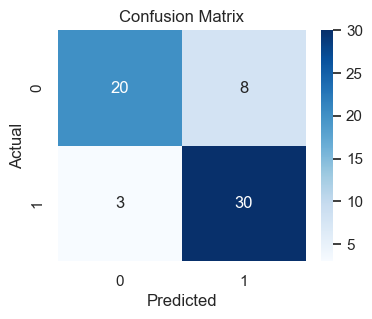

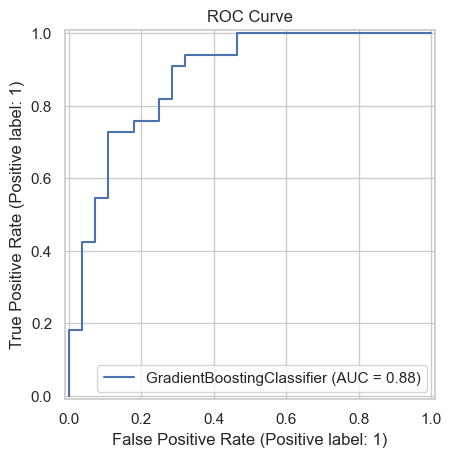

In [19]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(gb_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

To assess model performance, I used the F1 Score and AUC-ROC as primary metrics, which are well-suited for medical diagnosis tasks:

- **F1 Score** balances precision and recall, giving a single measure of accuracy that’s robust to class imbalance.
- **AUC-ROC** evaluates the model’s ability to distinguish between classes across all thresholds.

Additionally, the confusion matrix provides a clear view of correct and incorrect predictions. The Gradient Boosting model demonstrates strong predictive ability, as shown by the F1 and AUC-ROC scores.

These results indicate the model’s potential for supporting early detection of heart disease.

---

## Step 6: Healthcare Insights

Based on the model’s predictions and the relationships observed in the dataset, several actionable insights emerge for healthcare professionals:

- **Early Risk Identification:**  
  The model can help flag patients who are at higher risk of developing heart disease based on their medical profiles, allowing for targeted screening and proactive interventions.

- **Key Risk Factors:**  
  Features such as age, cholesterol level, resting blood pressure, and maximum heart rate were influential in predicting heart disease risk. Healthcare providers should pay close attention to these metrics during patient assessments.

- **Personalized Prevention:**  
  By identifying individuals at elevated risk, doctors can recommend personalized lifestyle changes, such as diet modification, exercise, and medication, to reduce the likelihood of heart disease.

- **Resource Optimization:**  
  Predictive modeling supports better allocation of healthcare resources by prioritizing high-risk patients for further diagnostic testing or specialist referral.

**Conclusion:**  
This predictive tool can aid early detection and prevention of heart disease, supporting healthcare professionals in delivering timely, data-driven care.

---